## Effect of batch size notebook

In [30]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import json
from copy import deepcopy
import random
import sys
import time
from typing import List
from pprint import PrettyPrinter
pp = PrettyPrinter(indent=4)

# get an absolute path to the directory that contains parent files
__file__ = globals()['_dh'][0]
project_dir = __file__ = globals()['_dh'][0]
sys.path.append(os.path.normpath(os.path.join(
    project_dir, '..', '..', '..')))

from experiments.utils.constants import (
    PIPLINES_PATH,
    NODE_PROFILING_CONFIGS_PATH,
    NODE_PROFILING_RESULTS_STATIC_PATH
)
from experiments.utils.loader import Loader

In [31]:
series = 34
experiment_id = 2
config_key_mapper = "key_config_mapper.csv"

series_path = os.path.join(
    NODE_PROFILING_RESULTS_STATIC_PATH,
    'series',
    str(series))
loader1 = Loader(
    series_path=series_path, config_key_mapper=config_key_mapper, second_node=False, type_of='node')
# loader2 = Loader(
#     series_path=series_path, config_key_mapper=config_key_mapper, second_node=False, type_of='node_with_log')
results_1 = loader1.result_processing()
# results_2 = loader2.result_processing()
key_config_df = loader1.key_config_mapper()
# print(results.columns)
# print(key_config_df.columns)
# results
display(key_config_df)

excepted-1!
excepted-1!
excepted-1!
excepted-1!
excepted-1!
excepted-1!
excepted-1!
excepted-1!


,experiment_id,pipeline_name,node_name,model_variant,cpu_request,memory_request,max_batch_size,max_batch_time,load,load_duration,series,series_meta,replicas,no_engine
0,1,6-mlserver-mock,mock-one,0,4,8Gi,1,1,1,60,34,redo-of-34,1,False
1,2,6-mlserver-mock,mock-one,0,4,8Gi,1,1,40,60,34,redo-of-34,1,False
2,3,6-mlserver-mock,mock-one,0,4,8Gi,1,1,100,60,34,redo-of-34,1,False
3,4,6-mlserver-mock,mock-one,0,4,8Gi,1,1,1000,60,34,redo-of-34,1,False
4,5,6-mlserver-mock,mock-one,1,4,8Gi,1,1,1,60,34,redo-of-34,1,False
5,6,6-mlserver-mock,mock-one,1,4,8Gi,1,1,40,60,34,redo-of-34,1,False
6,7,6-mlserver-mock,mock-one,1,4,8Gi,1,1,100,60,34,redo-of-34,1,False
7,8,6-mlserver-mock,mock-one,1,4,8Gi,1,1,1000,60,34,redo-of-34,1,False


In [32]:
results_1

,experiment_id,client_to_model_latencies_avg,client_to_model_latencies_p99,client_to_model_latencies_p50,client_to_model_latencies_var,client_to_model_latencies_max,client_to_model_latencies_min,model_latencies_avg,model_latencies_p99,model_latencies_p50,...,memory_usage_p50,memory_usage_var,memory_usage_max,memory_usage_min,throughput_avg,throughput_p99,throughput_p50,throughput_var,throughput_max,throughput_min
0,6,6.606281,13.008265,6.615421,16.360732,13.139159,0.076774,1.002478,1.002888,1.002643,...,560437248.0,7.894622e+15,7.131668e+08,443920384.0,0.832065,1.000000,0.991597,0.081537,1.000000,0.015867
1,4,51.516400,95.821070,52.932699,743.103012,97.095516,0.227532,0.000790,0.002026,0.000682,...,479657984.0,1.959308e+14,4.805550e+08,443199488.0,231.403417,393.649076,238.139167,16300.311594,394.210084,5.590000
2,8,6.789438,13.193040,6.787906,16.403496,13.324308,0.261825,1.002812,1.003567,1.002947,...,937426944.0,8.065397e+16,1.426969e+09,443404288.0,0.948930,1.000000,0.991597,0.028630,1.008403,0.010400
3,1,0.009274,0.027786,0.008498,0.000019,0.040549,0.006932,0.001586,0.002066,0.001594,...,444719104.0,7.274066e+11,4.450673e+08,443035648.0,0.254603,0.490433,0.253391,0.020456,0.495230,0.012229
4,3,0.136428,0.550928,0.128692,0.007312,0.674227,0.004120,0.000720,0.001693,0.000606,...,443908096.0,1.388136e+14,4.773519e+08,443146240.0,26.159167,49.434167,26.159167,194.618056,49.909167,2.409167
5,7,6.657662,13.060037,6.655041,16.401628,13.190649,0.134782,1.002379,1.002983,1.002638,...,771592192.0,4.379740e+16,1.114464e+09,443269120.0,0.929515,1.000000,0.991597,0.038923,1.000000,0.008858
6,5,1.084498,2.200715,1.060295,0.390380,2.231928,0.003850,1.002613,1.003678,1.002661,...,443351040.0,9.643491e+11,4.453376e+08,442822656.0,0.248387,0.489793,0.244691,0.020362,0.494794,0.011567
7,2,0.041277,0.188084,0.038321,0.000757,0.234540,0.004138,0.000862,0.001850,0.000774,...,444194816.0,4.204240e+13,4.586045e+08,443633664.0,10.306400,19.695140,10.321667,31.138480,19.850868,0.840000


In [33]:
results_1.keys()

Index(['experiment_id', 'client_to_model_latencies_avg',
       'client_to_model_latencies_p99', 'client_to_model_latencies_p50',
       'client_to_model_latencies_var', 'client_to_model_latencies_max',
       'client_to_model_latencies_min', 'model_latencies_avg',
       'model_latencies_p99', 'model_latencies_p50', 'model_latencies_var',
       'model_latencies_max', 'model_latencies_min',
       'model_to_client_latencies_avg', 'model_to_client_latencies_p99',
       'model_to_client_latencies_p50', 'model_to_client_latencies_var',
       'model_to_client_latencies_max', 'model_to_client_latencies_min',
       'start_time', 'end_time', 'duration', 'timeout_count',
       'cpu_usage_count_avg', 'cpu_usage_count_p99', 'cpu_usage_count_p50',
       'cpu_usage_count_var', 'cpu_usage_count_max', 'cpu_usage_count_min',
       'cpu_usage_rate_avg', 'cpu_usage_rate_p99', 'cpu_usage_rate_p50',
       'cpu_usage_rate_var', 'cpu_usage_rate_max', 'cpu_usage_rate_min',
       'cpu_throttled_coun

In [34]:
configs = loader1.load_configs()
for config_name, config in configs.items():
    print(f"File name: {config_name}")
    pp.pprint(config) 

File name: 0.yaml
{   'cpu_request': ['4'],
    'data_type': 'audio',
    'max_batch_size': ['1'],
    'max_batch_time': ['1'],
    'memory_request': ['8Gi'],
    'model_variants': ['0', '1'],
    'no_engine': False,
    'node_name': 'mock-one',
    'pipeline_name': '6-mlserver-mock',
    'repetition': 1,
    'replicas': [1],
    'series': 34,
    'series_meta': 'redo-of-34',
    'timeout': 150,
    'workload_config': {   'load_duration': 60,
                           'loads_to_test': [1, 40, 100, 1000]},
    'workload_type': 'static'}


In [40]:
model_variant = 1
experiment_ids = key_config_df[
    key_config_df['model_variant'] == model_variant]['experiment_id'].tolist()
metadata_columns = ['model_variant', 'max_batch_size', 'cpu_request', 'load']
results_columns = ['timeout_count']
output = loader1.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
display(output)
# ax = output.plot.bar(x='load', y=['client_to_model_latencies_avg', 'model_latencies_avg', 'model_to_client_latencies_avg'])
# ax.set_xlabel("Load")
# ax.set_ylabel("Latency (seconds)")

excepted-1!
excepted-1!
excepted-1!
excepted-1!
excepted-1!
excepted-1!
excepted-1!
excepted-1!


,model_variant,max_batch_size,cpu_request,load,timeout_count
0,1,1,4,1,0
1,1,1,4,40,2386
2,1,1,4,100,5986
3,1,1,4,1000,59986


excepted-1!
excepted-1!
excepted-1!
excepted-1!
excepted-1!
excepted-1!
excepted-1!
excepted-1!


,model_variant,max_batch_size,cpu_request,load,client_to_model_latencies_avg,model_latencies_avg,model_to_client_latencies_avg
0,0,1,4,1,0.009274,0.001586,0.008322
1,0,1,4,40,0.041277,0.000862,0.035401
2,0,1,4,100,0.136428,0.000720,0.051226
3,0,1,4,1000,51.516400,0.000790,0.221905


Text(0, 0.5, 'Latency (seconds)')

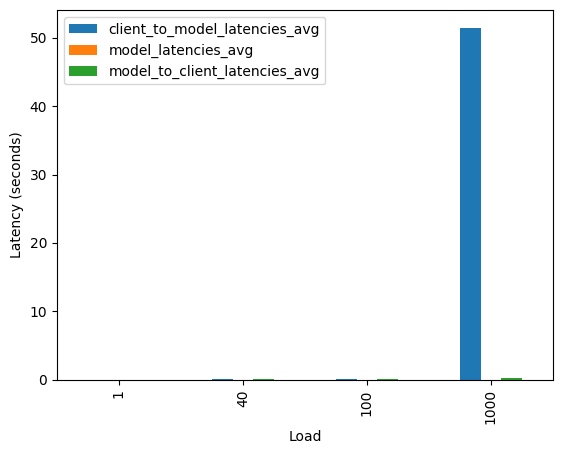

In [41]:
model_variant = 0
experiment_ids = key_config_df[
    key_config_df['model_variant'] == model_variant]['experiment_id'].tolist()
metadata_columns = ['model_variant', 'max_batch_size', 'cpu_request', 'load']
results_columns = ['client_to_model_latencies_avg', 'model_latencies_avg', 'model_to_client_latencies_avg']
output = loader1.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
display(output)
ax = output.plot.bar(x='load', y=['client_to_model_latencies_avg', 'model_latencies_avg', 'model_to_client_latencies_avg'])
ax.set_xlabel("Load")
ax.set_ylabel("Latency (seconds)")

excepted-1!
excepted-1!
excepted-1!
excepted-1!
excepted-1!
excepted-1!
excepted-1!
excepted-1!


,model_variant,max_batch_size,cpu_request,load,client_to_model_latencies_max,model_latencies_max,model_to_client_latencies_max
0,1,1,4,1,2.231928,1.004141,0.011595
1,1,1,4,40,13.139159,1.002901,0.215235
2,1,1,4,100,13.190649,1.002994,0.011201
3,1,1,4,1000,13.324308,1.003585,0.061949


Text(0, 0.5, 'Latency (seconds)')

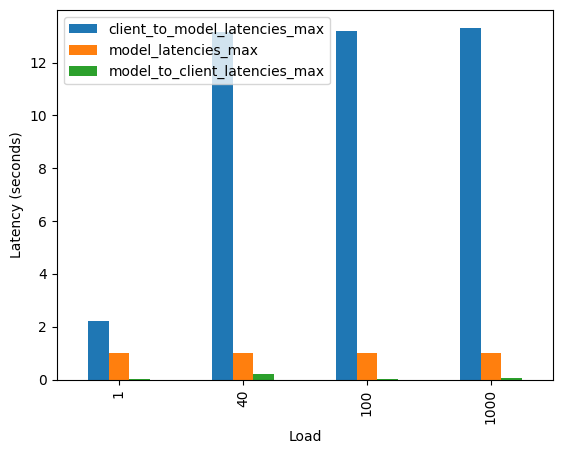

In [42]:
model_variant = 1
experiment_ids = key_config_df[
    key_config_df['model_variant'] == model_variant]['experiment_id'].tolist()
metadata_columns = ['model_variant', 'max_batch_size', 'cpu_request', 'load']
results_columns = ['client_to_model_latencies_max', 'model_latencies_max', 'model_to_client_latencies_max']
output = loader1.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
display(output)
ax = output.plot.bar(x='load', y=['client_to_model_latencies_max', 'model_latencies_max', 'model_to_client_latencies_max'])
ax.set_xlabel("Load")
ax.set_ylabel("Latency (seconds)")

In [15]:
import time
results = loader1.read_results()
experiment_id = 4
responses = loader1.flatten_results(results[str(experiment_id)]['responses'])
sending_times = []
for response in responses:
    try:
        sending_time = time.ctime(response['timing']['sending_time'])
        model_arrival_time = time.ctime(
        json.loads(
            response['outputs'][0][
                'data'][0])['time']['arrival_mock_one'])
        arrival_time = time.ctime(response['timing']['arrival_time'])
    except KeyError:
        # print('timed out!')
        pass
    print(f"sending time: {sending_time}, model_arrival_time: {model_arrival_time}, arrival time: {arrival_time}")

excepted-1!
excepted-1!
excepted-1!
excepted-1!
excepted-1!
excepted-1!
excepted-1!


NameError: name 'sending_time' is not defined

In [ ]:
responses[0]

{'model_name': 'mock-one',
 'model_version': None,
 'id': '564a19a6-98bf-45d5-a34a-17a88a490995',
 'parameters': {'content_type': None, 'headers': None},
 'outputs': [{'name': 'output',
   'shape': [1],
   'datatype': 'BYTES',
   'parameters': {'content_type': 'str', 'headers': None},
   'data': ['{"time": {"arrival_mock_one": 1667608189.1664495, "serving_mock_one": 1667608189.1755807}, "output": []}']}],
 'timing': {'sending_time': 1667608187.7076497,
  'arrival_time': 1667608191.340488}}